# Diagonalización Por Método De Gauss, Factorización LU y Factorización QR

## Ejercicio 1
En este ejercicio deberán implementar el método de eliminación Gaussiana para diagonalizar una matriz cuadrada.

**Paso 1**: Programa una función que reciba una Matriz cuadrada de tamaño $n×n, M$, y que por medio del método de eliminacion Gaussiana regrese una **Matriz triangular superior**. Una vez que hayas terminado prueba tu función con distintas matrices cuadradas usando el comando.

**¡¡Cuidado!!** Hay que tener cuidado cuando hay un 0 en la diagonal. Lo más fácil es suponer que eso no va a pasar y programar el método de eliminación Gaussiana omitiendo ese hecho; pero lo correcto es corroborar que eso no pase llevando a cabo un intercambio con alguno de los renglones debajo del renglón que tiene 0 en la diagonal. Intenta resolver el primer caso y luego agregarle el paso en el que te aseguras que no haya ceros en la diagonal.

In [23]:
import numpy as np
def triangular_sup(M):
    n = len(M)

    for i in range(n):
        # Con este if verificamos si la diagonal posee ceros
        if M[i, i] == 0:
            # Intercambio de filas
            for j in range(i + 1, n):
                if M[j, i] != 0:
                    # Cambiamos las fijas i e j 
                    M[[i, j]] = M[[j, i]]
                    break
            else:
                # Si no se encuentra una fila adecuada, la matriz no es invertible
                raise ValueError("La matriz no puede ser invertible")

        # Hacer ceros por debajo de la diagonal en la columna actual
        for j in range(i + 1, n):
            factor = M[j, i] / M[i, i]
            M[j, i:] -= factor * M[i, i:]

    return M

In [24]:
m1 = np.array([[0,6,7,56],
               [8,5,56,88],
              [12,56,0,14],
              [5,76,48,1]], dtype=float)
triangular_sup(m1)
print(m1)

[[   8.            5.           56.           88.        ]
 [   0.            6.            7.           56.        ]
 [   0.            0.         -140.58333333 -570.66666667]
 [   0.            0.            0.         -441.81416716]]


In [25]:
m2 = np.array([[1,5,88,36],
               [123,5,65,8],
              [1244,56,0,14],
              [56,26,846,25]],  dtype=float)
triangular_sup(m2)
print(m2)

[[ 1.00000000e+00  5.00000000e+00  8.80000000e+01  3.60000000e+01]
 [ 0.00000000e+00 -6.10000000e+02 -1.07590000e+04 -4.42000000e+03]
 [ 0.00000000e+00  0.00000000e+00 -7.53186885e+02 -1.06262295e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.06689007e+02]]


In [26]:
m3 = np.array([[45,5,89,63],
               [23,5,65,89],
              [44,56,10,145],
              [67,5,8,5]],  dtype=float)
triangular_sup(m3)
print(m3)

[[   45.             5.            89.            63.        ]
 [    0.             2.44444444    19.51111111    56.8       ]
 [    0.             0.          -484.98181818 -1104.23636364]
 [    0.             0.             0.           207.07044313]]


Problema a considerar. 
\begin{equation} 
A = \begin{bmatrix} 
1 & 2 & -2 & 1 \\ 
4 & 5 & -7 & 6\\ 
5 & 25 & -15 & -3\\ 
6 & -12 & -6 & 22 
\end{bmatrix} 
\end{equation}

\begin{equation} 
A \sim \begin{bmatrix} 1 & 2 & -2 & 1\\
0 & -3 & 1 & 2\\
0 & 15 & -5 & -8\\
0 & -24 & 6 & 16 \\
\end{bmatrix} 
\sim \begin{bmatrix} 
1 & 2 & -2 & 1\\
0 & -3 & 1 & 2\\
0 & 0 & 0 & 2\\
0 & 0 & -2 & 0 \
\end{bmatrix} \end{equation}

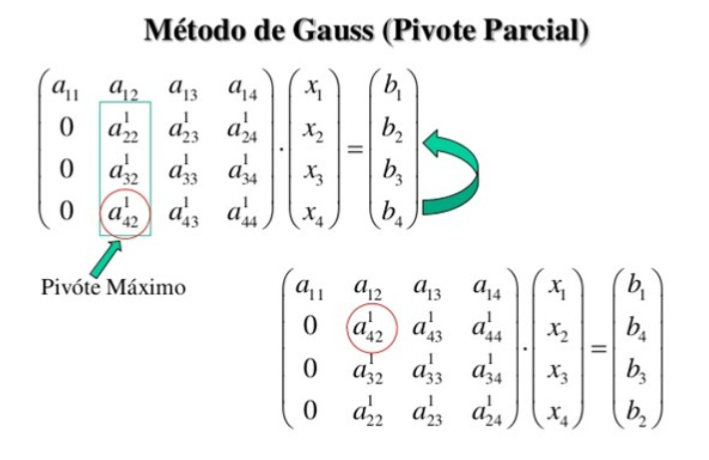

1. Se busca en la columna j de la matriz el mayor número en valor absoluto y dicho valor se ubica. 
2. Se pasa intercambian renglones de la matriz y se procede a hacer la eliminación Gaussiana.

**Paso 2:** Programa una función que reciba una Matriz cuadrada de tamaño $n×n, T$, que además sea triangular superior (como la que obtenemos al usar las función que programaste en el paso 1) y que se encargue de eliminar todos los elementos superiores a la diagonal usando una vez más el método de eliminación Gaussiana.

In [27]:
def eliminacion_superior(matriz_triangular_superior):
    n = len(matriz_triangular_superior)

    for i in range(n - 1, 0, -1):
        # Hacer ceros por encima de la diagonal en la columna actual
        for j in range(i - 1, -1, -1):
            factor = matriz_triangular_superior[j, i] / matriz_triangular_superior[i, i]
            matriz_triangular_superior[j, i:] -= factor * matriz_triangular_superior[i, i:]

    return matriz_triangular_superior


**Paso 3:** Finalmente, programa una función que reciba una Matriz cuadrada de tamaño n×n, M, y que mande a llamar las dos funciones que programaste anteriormente, de forma que al final regrese la diagonal de la matriz que obtuviste al final del procedimiento

In [28]:
def diagonalizar_matriz(matriz):
    # LLamando a la primer función 
    matriz_triangular_superior = triangular_sup(matriz.copy())

    # Llamando a la segunda función 
    matriz_diagonalizada = eliminacion_superior(matriz_triangular_superior.copy())

    return matriz_diagonalizada


In [29]:
## Pruebas

# Ejemplo de uso con una matriz cuadrada
matriz_ejemplo = np.array([[1, 2, 3],
                           [1, 0, 1],
                           [1, -1, 1]], dtype=float)

diagonal_resultante = diagonalizar_matriz(matriz_ejemplo)
print("Diagonal resultante:\n", diagonal_resultante)

Diagonal resultante:
 [[ 1.  0.  0.]
 [ 0. -2.  0.]
 [ 0.  0.  1.]]


## Ejercicio 2: 
En este ejercicio deberán implementar el método para encontrar la factorización $LU$ de una matriz cuadrada.\

**Paso 1:** Programen una función que calcule la factorización $LU$ de una matriz cuadrada, $A$, de tamaño $n×n$ y que regrese tanto la matriz triangular inferior $L$, como la matriz triangular superior $U$. Una vez que hayas terminado prueba tu función con distintas matrices cuadradas usando el comando python`` A = np.random.random((n,n)) ``con diferentes valores para $n$. 
1. La matriz $L$ inicialmente es la matriz identidad con el mismo número de renglones de $A$. Si se utilizó la operación $R_i = R_i + c*Pivote_j$ entonces en la posición $L[i, j]$ se coloca $-c$. 
2. La matriz $U$ es la matriz que queda en al escalonar $A$.
\begin{equation} 
A = \begin{bmatrix} 
2 & 1 & 1\\
4 & 1 & 0\\
-2 & 2 & 1 \\
\end{bmatrix} 
\end{equation} 
\begin{equation} 
A \sim \begin{bmatrix}
2 & 1 & 1\\
0 & -1 & -2\\\
-2 & 2 & 2 \\
\end{bmatrix}, 
\quad E_{1} = 
\begin{bmatrix} 
1 & 0 & 0\\ 
-2 & 1 & 0\\
0 & 0 & 1 \\
\end{bmatrix}, 
\quad E_{1}^{-1} = 
\begin{bmatrix} 
1 & 0 & 0\\
2 & 1 & 0\\
0 & 0 & 1 \\
\end{bmatrix} 
\end{equation} 
\begin{equation} 
A \sim \begin{bmatrix}
2 & 1 & 1\\
0 & -1 & -2\\
0 & 3 & 1 \\
\end{bmatrix}, 
\quad E_{2} = 
\begin{bmatrix} 
1 & 0 & 0\\
0 & 1 & 0\\ 
1 & 0 & 1\\\
\end{bmatrix}, 
E_{2}^{-1} = \begin{bmatrix} 
1 & 0 & 0\\
0 & 1 & 0\\
-1 & 0 & 1\\
\end{bmatrix}, 
\quad E_{1}^{-1}E_{2}^{-1} = 
\begin{bmatrix} 
1 & 0 & 0\\
2 & 1 & 0\\ 
-1 & 0 & 1\\
\end{bmatrix} 
\end{equation} 
\begin{equation} 
A \sim \begin{bmatrix} 
2 & 1 & 1\\
0 & -1 & -2\\
0 & 0 & 4 \\
\end{bmatrix} = U, 
\quad E_{3} = \begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 3 & 1\\
\end{bmatrix},
E_{3}^{-1} = \begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & -3 & 1\\
\end{bmatrix}, 
\quad L = E_{1}^{-1}E_{2}^{-1}E_{3}^{-1} = 
\begin{bmatrix} 1 & 0 & 0\\
2 & 1 & 0\\
-1 & -3 & 1 \\
\end{bmatrix} 
\end{equation}

**Información:** Cuando no es posible factorizar una matriz de la forma $LU$, lo que se aplica es la factorización $P⋅A=L⋅U$, donde $P$ es una matriz de permutación.

In [30]:
def FactorizacionLU(A):
    # Dimension de la matriz
    n = len(A)
    # Matriz L es la identidad en un principio
    L = np.identity(n)
    # inicialmente la matriz A y la matriz U son iguales
    U = np.zeros((n,n))
    for i in range(0,n):
        for j in range(0,n):
            U[i][j] = A[i][j]
    for i in range(0,n):
        for j in range(i+1,n):
            # guardar los factores de eliminacion gaussiana 
            # en la matriz L
            factor = U[j][i]/U[i][i]
            L[j][i] = factor
            # realizar eliminacion gaussiana en la matriz U
            # para quedar de forma triangular superior
            for k in range(i,n):
                U[j][k] = U[j][k] - factor*U[i][k]
    return L,U

## Pruebas 

In [31]:
A1 = np.random.random((3,3))
print(A1)
print('Aplicando la función LU')
print('L: ' ,FactorizacionLU(A1)[0])
print('U: ' ,FactorizacionLU(A1)[1])

[[0.8819588  0.00679403 0.7120229 ]
 [0.75641207 0.63180138 0.09863647]
 [0.83353076 0.30634057 0.31618388]]
Aplicando la función LU
L:  [[1.         0.         0.        ]
 [0.85765012 1.         0.        ]
 [0.94509036 0.47912432 1.        ]]
U:  [[ 0.8819588   0.00679403  0.7120229 ]
 [ 0.          0.62597448 -0.51203006]
 [ 0.          0.         -0.11141605]]


In [32]:
A2 = np.random.random((5,5))
print(A2)
print('Aplicando la función LU')
print('L: ' ,FactorizacionLU(A2)[0])
print('U: ' ,FactorizacionLU(A2)[1])

[[0.77687216 0.1786593  0.01406268 0.14329098 0.0042833 ]
 [0.95610667 0.27148922 0.90454517 0.60460726 0.8203669 ]
 [0.12109204 0.84558769 0.65142988 0.48252186 0.14891247]
 [0.8094521  0.50043998 0.33074119 0.41127508 0.55563699]
 [0.26430875 0.2271604  0.62999264 0.80528376 0.16661539]]
Aplicando la función LU
L:  [[ 1.          0.          0.          0.          0.        ]
 [ 1.23071302  1.          0.          0.          0.        ]
 [ 0.15587125 15.84432483  1.          0.          0.        ]
 [ 1.04193733  6.08957022  0.37937343  1.          0.        ]
 [ 0.34022168  3.22367255  0.16668271  8.01155319  1.        ]]
U:  [[ 7.76872156e-01  1.78659297e-01  1.40626818e-02  1.43290984e-01
   4.28330170e-03]
 [ 0.00000000e+00  5.16108985e-02  8.87238046e-01  4.28257184e-01
   8.15095385e-01]
 [ 0.00000000e+00  0.00000000e+00 -1.34084499e+01 -6.32525901e+00
  -1.27663912e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  5.37078659e-02
   4.30823102e-01]
 [ 0.00000000e+00  0.

In [33]:
A3 = np.random.random((4,4))
print(A3)
print('Aplicando la función LU')
print('L: ' ,FactorizacionLU(A3)[0])
print('U: ' ,FactorizacionLU(A3)[1])

[[0.41524987 0.15153594 0.64705745 0.10728739]
 [0.40721356 0.33045812 0.52290696 0.94797187]
 [0.87787275 0.59828323 0.08712842 0.39374557]
 [0.15220208 0.71636561 0.21329895 0.24908747]]
Aplicando la función LU
L:  [[ 1.          0.          0.          0.        ]
 [ 0.98064705  1.          0.          0.        ]
 [ 2.11408314  1.52827192  1.          0.        ]
 [ 0.36653131  3.63379324 -0.34386861  1.        ]]
U:  [[ 0.41524987  0.15153594  0.64705745  0.10728739]
 [ 0.          0.18185485 -0.11162802  0.8427608 ]
 [ 0.          0.         -1.11020686 -1.12103657]
 [ 0.          0.          0.         -3.23814451]]


**Paso 2:** Corrobora que el producto de matrices $LU$ regresa la matriz original $A$ a la que se le encontró la factorización.

In [34]:
A = np.array([[2,1,1],
              [4,1,0],
              [-2,2,1]])
print(A)
print('Aplicando la función LU')
print('L: ' ,FactorizacionLU(A)[0])
print('U: ' ,FactorizacionLU(A)[1])

[[ 2  1  1]
 [ 4  1  0]
 [-2  2  1]]
Aplicando la función LU
L:  [[ 1.  0.  0.]
 [ 2.  1.  0.]
 [-1. -3.  1.]]
U:  [[ 2.  1.  1.]
 [ 0. -1. -2.]
 [ 0.  0. -4.]]


## Ejercicio 3:
En este ejercicio te toca programar la descomposición $QR$ de una matriz $A$ La idea es usar el **Proceso de Gram-Schmidt**:

A partir de los vectores linealmente independientes $v_1 ,...,v_n$ se construye $u_1 ,...,u_n$ vectores normales. \begin{equation} u_{1} = v_{1}, \quad u_{k} = v_{k} - \sum {j = 1}^{k-1}\frac{\left \langle v{k}, u_{j} \right \rangle}{\left | u_{j} \right |^{2}} u_{j}, j = 2, \dots, k \end{equation} \begin{equation} e_{i} = \frac{u_{i}}{\left | u_{i} \right |} \end{equation} 

**Recordatorio:** $‖u‖^2 =⟨u,u⟩$

**Paso 1:** Programa una función que calcule la proyección de un vector $u$ sobre otro vector $v$

In [35]:
def proyeccion_sobre_vector(u, v):
    """
    Calcula la proyección de un vector u sobre otro vector v.

    Parameters:
    u (numpy.ndarray): Vector de entrada.
    v (numpy.ndarray): Vector sobre el cual se proyecta u.

    Returns:
    numpy.ndarray: Proyección de u sobre v.
    """
    # Asegúrate de que u y v son arrays de NumPy
    u = np.array(u)
    v = np.array(v)

    # Calcula la proyección
    proyeccion = (np.dot(u, v) / np.dot(v, v)) * v

    return proyeccion

In [36]:
vector_u = np.array([3, 4])
vector_v = np.array([1, 2])

proyeccion_resultado = proyeccion_sobre_vector(vector_u, vector_v)
print("Proyección de u sobre v:", proyeccion_resultado)

Proyección de u sobre v: [2.2 4.4]


**Paso 2:** Programa una función que calcule la descomposición $QR$ de una matriz $A$ y que regrese las matrices $Q$ y $R$. 
\begin{equation} A = 
\begin{bmatrix} a_{1}| a_{2}| \dots |a_{n} 
\end{bmatrix} = 
\begin{bmatrix} e_{1}| e_{2}| \dots |e_{n} 
\end{bmatrix} 
\begin{bmatrix} a_{1}\cdot e_{1} & a_{2}e_{1} & \cdots & a_{n}\cdot e_{1}\\
0 & a_{2}\cdot e_{2} & \cdots & a_{n}\cdot e_{2}\\
0 & 0 & \ddots & \vdots\\
0 & 0 & \cdots & a_{n}\cdot e_{n} 
\end{bmatrix} \end{equation}

In [37]:
def factorizacion_qr(matriz):
    """
    Realiza la factorización QR de una matriz.

    Parameters:
    matriz (numpy.ndarray): Matriz a ser factorizada.

    Returns:
    Q (numpy.ndarray): Matriz ortogonal.
    R (numpy.ndarray): Matriz triangular superior.
    """
    m, n = matriz.shape
    Q = np.eye(m)

    for i in range(min(m, n)):
        # Construye una base para el subespacio de Householder
        x = matriz[i:, i]
        v = np.zeros_like(x)
        v[0] = np.linalg.norm(x)
        v = v - x
        v = v / np.linalg.norm(v)

        # Aplica la transformación de Householder a la submatriz
        matriz[i:, i:] = matriz[i:, i:] - 2 * np.outer(v, np.dot(v, matriz[i:, i:]))

        # Actualiza la matriz ortogonal Q
        H = np.eye(m)
        H[i:, i:] = H[i:, i:] - 2 * np.outer(v, v)
        Q = np.dot(Q, H)

    R = matriz[:n, :n]

    return Q, R

# Ejemplo de uso
matriz_ejemplo = np.array([[1, 4, 7],
                           [2, 5, 8],
                           [3, 6, 9]])

Q, R = factorizacion_qr(matriz_ejemplo)

print("Matriz Q:")
print(Q)
print("\nMatriz R:")
print(R)

Matriz Q:
[[ 0.52941176 -0.70588235  0.47058824]
 [ 0.47058824  0.70588235  0.52941176]
 [ 0.70588235  0.05882353 -0.70588235]]

Matriz R:
[[ 3  8 13]
 [ 0  0  1]
 [ 0  0  1]]


**Paso 3:**
Prueba tu funicón con diferentes matrices y corrobora que el producto de matrices $QR$ regresa la matriz original $A$ a la que se le encontró la factorización. Para llevar a cabo el producto de matrices $QR$ puedes utilziar la siguiente linea de código ``Q.dot(r)``

In [38]:
matriz_ejemplo = np.array([[1, 4, 7],
                           [2, 5, 8],
                           [3, 6, 9]])

Q, R = factorizacion_qr(matriz_ejemplo)

print("Matriz Q:")
print(Q)
print("\nMatriz R:")
print(R)
Q.dot(R)

Matriz Q:
[[ 0.52941176 -0.70588235  0.47058824]
 [ 0.47058824  0.70588235  0.52941176]
 [ 0.70588235  0.05882353 -0.70588235]]

Matriz R:
[[ 3  8 13]
 [ 0  0  1]
 [ 0  0  1]]


array([[1.58823529, 4.23529412, 6.64705882],
       [1.41176471, 3.76470588, 7.35294118],
       [2.11764706, 5.64705882, 8.52941176]])